In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import uproot

from coffea import hist
from coffea.nanoaod import NanoEvents
# Defines the file (which is on a remote server). In this case, the file is a specific nanoAOD with more information related to tagger inputs.
fTThad = "root://xrootd-cms.infn.it//store/mc/RunIISummer19UL17NanoAOD/TTToHadronic_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/106X_mc2017_realistic_v6-v4/100000/01A5544B-5290-3245-9FCA-5E25300AD920.root"
fQCD = "root://xrootd-cms.infn.it//store/mc/RunIISummer19UL17NanoAOD/QCD_Pt_80to120_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v6-v1/270000/0AB9B1BD-5C2F-6E40-B89D-BF7338B6EA11.root"

In [2]:
# Opens the file using uproot (but requires xrootd to access the file over the web)
# tree_had = uproot.open(fTThad, library='pd')['Events']
events = NanoEvents.from_file(fTThad)
ev_QCD = NanoEvents.from_file(fQCD)
# tree_QCD = uproot.open(fQCD)

/afs/cern.ch/work/m/milee/btag/coffea-hats/coffea-hats/lib64/python3.6/site-packages/coffea/util.py:98: Awkward0Warning: In coffea version 0.7 (target date: January 2021), this will be an error.
(Set awkward1.deprecations_as_errors = True to get a stack trace now.)
TypeError: <class 'coffea.nanoaod.nanoevents.NanoEvents'> relies exclusively on awkward 0.x and will be removed in upcoming versions of coffea!
  warnings.warn(message, Awkward0Warning)
/afs/cern.ch/work/m/milee/btag/coffea-hats/coffea-hats/lib64/python3.6/site-packages/coffea/util.py:98: Awkward0Warning: In coffea version 0.7 (target date: January 2021), this will be an error.
(Set awkward1.deprecations_as_errors = True to get a stack trace now.)
TypeError: <class 'coffea.nanoaod.nanoevents.NanoCollection'> relies exclusively on awkward 0.x and will be removed in upcoming versions of coffea!
  warnings.warn(message, Awkward0Warning)


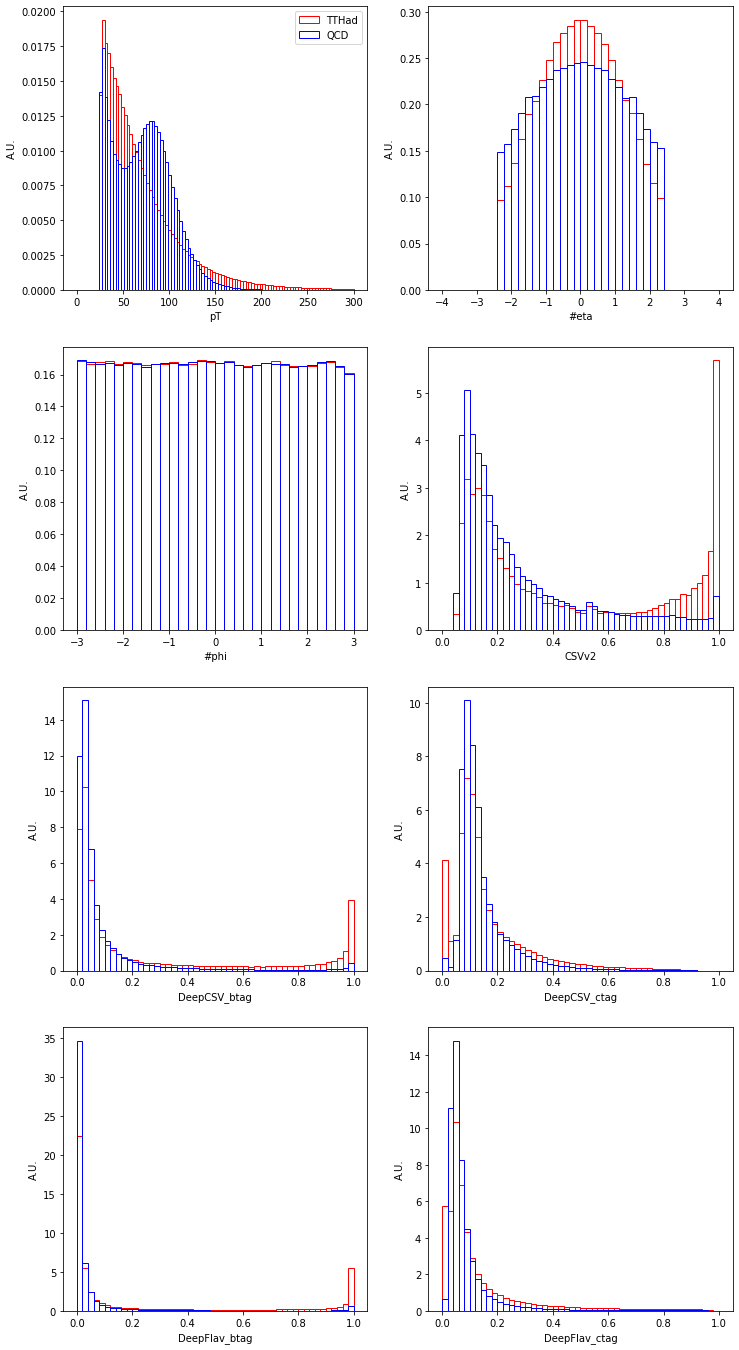

In [3]:
# Plot Jet pT, eta, phi, Deepflavor
pts = events.Jet[(events.Jet.pt>25)&(abs(events.Jet.eta)<2.4)&(events.Jet.puId>3)].pt.flatten()

etas = events.Jet[(events.Jet.pt>25)&(abs(events.Jet.eta)<2.4)&(events.Jet.puId>3)].eta.flatten()
phis = events.Jet[(events.Jet.pt>25)&(abs(events.Jet.eta)<2.4)&(events.Jet.puId>3)].phi.flatten()
csvv2s = events.Jet[(events.Jet.pt>25)&(abs(events.Jet.eta)<2.4)&(events.Jet.puId>3)].btagCSVV2.flatten()
deepcsvb = events.Jet[(events.Jet.pt>25)&(abs(events.Jet.eta)<2.4)&(events.Jet.puId>3)].btagDeepB.flatten()
deepcsvc = events.Jet[(events.Jet.pt>25)&(abs(events.Jet.eta)<2.4)&(events.Jet.puId>3)].btagDeepC.flatten()
deepflavb = events.Jet[(events.Jet.pt>25)&(abs(events.Jet.eta)<2.4)&(events.Jet.puId>3)].btagDeepFlavB.flatten()
deepflavc = events.Jet[(events.Jet.pt>25)&(abs(events.Jet.eta)<2.4)&(events.Jet.puId>3)].btagDeepFlavC.flatten()
pts_QCD = ev_QCD.Jet[(ev_QCD.Jet.pt>25)&(abs(ev_QCD.Jet.eta)<2.4)&(ev_QCD.Jet.puId>3)].pt.flatten()
etas_QCD = ev_QCD.Jet[(ev_QCD.Jet.pt>25)&(abs(ev_QCD.Jet.eta)<2.4)&(ev_QCD.Jet.puId>3)].eta.flatten()
phis_QCD = ev_QCD.Jet[(ev_QCD.Jet.pt>25)&(abs(ev_QCD.Jet.eta)<2.4)&(ev_QCD.Jet.puId>3)].phi.flatten()
csvv2s_QCD = ev_QCD.Jet[(ev_QCD.Jet.pt>25)&(abs(ev_QCD.Jet.eta)<2.4)&(ev_QCD.Jet.puId>3)].btagCSVV2.flatten()
deepcsvb_QCD = ev_QCD.Jet[(ev_QCD.Jet.pt>25)&(abs(ev_QCD.Jet.eta)<2.4)&(ev_QCD.Jet.puId>3)].btagDeepB.flatten()
deepcsvc_QCD =ev_QCD.Jet[(ev_QCD.Jet.pt>25)&(abs(ev_QCD.Jet.eta)<2.4)&(ev_QCD.Jet.puId>3)].btagDeepC.flatten()
deepflavb_QCD = ev_QCD.Jet[(ev_QCD.Jet.pt>25)&(abs(ev_QCD.Jet.eta)<2.4)&(ev_QCD.Jet.puId>3)].btagDeepFlavB.flatten()
deepflavc_QCD = ev_QCD.Jet[(ev_QCD.Jet.pt>25)&(abs(ev_QCD.Jet.eta)<2.4)&(ev_QCD.Jet.puId>3)].btagDeepFlavC.flatten()
# events.GenJet.columns
# print(pts)
fig, axs = plt.subplots(nrows=4, ncols=2,figsize=(12, 24))
axs[0,0].hist(pts,100,(0,300),edgecolor='r',fill=False,density=True,label="TTHad")
axs[0,0].hist(pts_QCD,100,(0,300),edgecolor='b',fill=False,density=True,label="QCD")
axs[0,0].set_ylabel('A.U.')
axs[0,0].set_xlabel('pT')
axs[0,1].hist(etas,40,(-4,4),edgecolor='r',fill=False,density=True)
axs[0,1].hist(etas_QCD,40,(-4,4),edgecolor='b',fill=False,density=True)
axs[0,1].set_ylabel('A.U.')
axs[0,1].set_xlabel('#eta')
axs[1,0].hist(phis,30,(-3,3),edgecolor='r',fill=False,density=True)
axs[1,0].hist(phis_QCD,30,(-3,3),edgecolor='b',fill=False,density=True)
axs[1,0].set_ylabel('A.U.')
axs[1,0].set_xlabel('#phi')
axs[1,1].hist(csvv2s,50,(0,1),edgecolor='r',fill=False,density=True)
axs[1,1].hist(csvv2s_QCD,50,(0,1),edgecolor='b',fill=False,density=True)
axs[1,1].set_ylabel('A.U.')
axs[1,1].set_xlabel('CSVv2')
axs[2,0].hist(deepcsvb,50,(0,1),edgecolor='r',fill=False,density=True)
axs[2,0].hist(deepcsvb_QCD,50,(0,1),edgecolor='b',fill=False,density=True)
axs[2,0].set_ylabel('A.U.')
axs[2,0].set_xlabel('DeepCSV_btag')
axs[2,1].hist(deepcsvc,50,(0,1),edgecolor='r',fill=False,density=True)
axs[2,1].hist(deepcsvc_QCD,50,(0,1),edgecolor='b',fill=False,density=True)
axs[2,1].set_ylabel('A.U.')
axs[2,1].set_xlabel('DeepCSV_ctag')
axs[3,0].hist(deepflavb,50,(0,1),edgecolor='r',fill=False,density=True)
axs[3,0].hist(deepflavb_QCD,50,(0,1),edgecolor='b',fill=False,density=True)
axs[3,0].set_ylabel('A.U.')
axs[3,0].set_xlabel('DeepFlav_btag')
axs[3,1].hist(deepflavc,50,(0,1),edgecolor='r',fill=False,density=True)
axs[3,1].hist(deepflavc_QCD,50,(0,1),edgecolor='b',fill=False,density=True)
axs[3,1].set_ylabel('A.U.')
axs[3,1].set_xlabel('DeepFlav_ctag')
axs[0,0].legend()

    

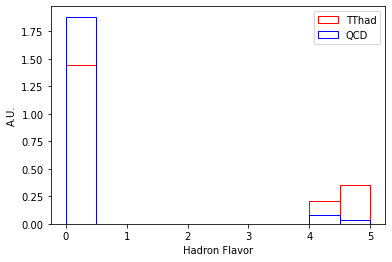

In [4]:
fig.savefig("allflav.png")
flav = events.Jet.hadronFlavour.flatten()
flav_QCD = ev_QCD.Jet.hadronFlavour.flatten()
plt.hist(flav,edgecolor='r',fill=False,density=True,label="TThad")
plt.hist(flav_QCD,edgecolor='b',fill=False,density=True,label="QCD")
plt.ylabel('A.U.')
plt.xlabel('Hadron Flavor')
plt.legend()
fig.savefig("flavor.png")

In [ ]:

pts_l = events.Jet[(events.Jet.pt>25)&(abs(events.Jet.eta)<2.4)&(events.Jet.puId>3)&(abs(events.Jet.hadronFlavour)<4)].pt.flatten()
etas_l = events.Jet[(events.Jet.pt>25)&(abs(events.Jet.eta)<2.4)&(events.Jet.puId>3)&(abs(events.Jet.hadronFlavour)<4)].eta.flatten()
phis_l = events.Jet[(events.Jet.pt>25)&(abs(events.Jet.eta)<2.4)&(events.Jet.puId>3)&(abs(events.Jet.hadronFlavour)<4)].phi.flatten()
csvv2s_l = events.Jet[(events.Jet.pt>25)&(abs(events.Jet.eta)<2.4)&(events.Jet.puId>3)&(abs(events.Jet.hadronFlavour)<4)].btagCSVV2.flatten()
deepcsvb_l = events.Jet[(events.Jet.pt>25)&(abs(events.Jet.eta)<2.4)&(events.Jet.puId>3)&(abs(events.Jet.hadronFlavour)<4)].btagDeepB.flatten()
deepcsvc_l = events.Jet[(events.Jet.pt>25)&(abs(events.Jet.eta)<2.4)&(events.Jet.puId>3)&(abs(events.Jet.hadronFlavour)<4)].btagDeepC.flatten()
deepflavb_l = events.Jet[(events.Jet.pt>25)&(abs(events.Jet.eta)<2.4)&(events.Jet.puId>3)&(abs(events.Jet.hadronFlavour)<4)].btagDeepFlavB.flatten()
deepflavc_l = events.Jet[(events.Jet.pt>25)&(abs(events.Jet.eta)<2.4)&(events.Jet.puId>3)&(abs(events.Jet.hadronFlavour)<4)].btagDeepFlavC.flatten()
pts_QCD_l = ev_QCD.Jet[(ev_QCD.Jet.pt>25)&(abs(ev_QCD.Jet.eta)<2.4)&(ev_QCD.Jet.puId>3)&(abs(ev_QCD.Jet.hadronFlavour)<4)].pt.flatten()
etas_QCD_l = ev_QCD.Jet[(ev_QCD.Jet.pt>25)&(abs(ev_QCD.Jet.eta)<2.4)&(ev_QCD.Jet.puId>3)&(abs(ev_QCD.Jet.hadronFlavour)<4)].eta.flatten()
phis_QCD_l = ev_QCD.Jet[(ev_QCD.Jet.pt>25)&(abs(ev_QCD.Jet.eta)<2.4)&(ev_QCD.Jet.puId>3)&(abs(ev_QCD.Jet.hadronFlavour)<4)].phi.flatten()
csvv2s_QCD_l = ev_QCD.Jet[(ev_QCD.Jet.pt>25)&(abs(ev_QCD.Jet.eta)<2.4)&(ev_QCD.Jet.puId>3)&(abs(ev_QCD.Jet.hadronFlavour)<4)].btagCSVV2.flatten()
deepcsvb_QCD_l = ev_QCD.Jet[(ev_QCD.Jet.pt>25)&(abs(ev_QCD.Jet.eta)<2.4)&(ev_QCD.Jet.puId>3)&(abs(ev_QCD.Jet.hadronFlavour)<4)].btagDeepB.flatten()
deepcsvc_QCD_l =ev_QCD.Jet[(ev_QCD.Jet.pt>25)&(abs(ev_QCD.Jet.eta)<2.4)&(ev_QCD.Jet.puId>3)&(abs(ev_QCD.Jet.hadronFlavour)<4)].btagDeepC.flatten()
deepflavb_QCD_l = ev_QCD.Jet[(ev_QCD.Jet.pt>25)&(abs(ev_QCD.Jet.eta)<2.4)&(ev_QCD.Jet.puId>3)&(abs(ev_QCD.Jet.hadronFlavour)<4)].btagDeepFlavB.flatten()
deepflavc_QCD_l = ev_QCD.Jet[(ev_QCD.Jet.pt>25)&(abs(ev_QCD.Jet.eta)<2.4)&(ev_QCD.Jet.puId>3)&(abs(ev_QCD.Jet.hadronFlavour)<4)].btagDeepFlavC.flatten()

pts_c = events.Jet[(events.Jet.pt>25)&(abs(events.Jet.eta)<2.4)&(events.Jet.puId>3)&(abs(events.Jet.hadronFlavour)==4)].pt.flatten()
etas_c = events.Jet[(events.Jet.pt>25)&(abs(events.Jet.eta)<2.4)&(events.Jet.puId>3)&(abs(events.Jet.hadronFlavour)==4)].eta.flatten()
phis_c = events.Jet[(events.Jet.pt>25)&(abs(events.Jet.eta)<2.4)&(events.Jet.puId>3)&(abs(events.Jet.hadronFlavour)==4)].phi.flatten()
csvv2s_c = events.Jet[(events.Jet.pt>25)&(abs(events.Jet.eta)<2.4)&(events.Jet.puId>3)&(abs(events.Jet.hadronFlavour)==4)].btagCSVV2.flatten()
deepcsvb_c = events.Jet[(events.Jet.pt>25)&(abs(events.Jet.eta)<2.4)&(events.Jet.puId>3)&(abs(events.Jet.hadronFlavour)==4)].btagDeepB.flatten()
deepcsvc_c = events.Jet[(events.Jet.pt>25)&(abs(events.Jet.eta)<2.4)&(events.Jet.puId>3)&(abs(events.Jet.hadronFlavour)==4)].btagDeepC.flatten()
deepflavb_c = events.Jet[(events.Jet.pt>25)&(abs(events.Jet.eta)<2.4)&(events.Jet.puId>3)&(abs(events.Jet.hadronFlavour)==4)].btagDeepFlavB.flatten()
deepflavc_c = events.Jet[(events.Jet.pt>25)&(abs(events.Jet.eta)<2.4)&(events.Jet.puId>3)&(abs(events.Jet.hadronFlavour)==4)].btagDeepFlavC.flatten()
pts_QCD_c = ev_QCD.Jet[(ev_QCD.Jet.pt>25)&(abs(ev_QCD.Jet.eta)<2.4)&(ev_QCD.Jet.puId>3)&(abs(ev_QCD.Jet.hadronFlavour)==4)].pt.flatten()
etas_QCD_c = ev_QCD.Jet[(ev_QCD.Jet.pt>25)&(abs(ev_QCD.Jet.eta)<2.4)&(ev_QCD.Jet.puId>3)&(abs(ev_QCD.Jet.hadronFlavour)==4)].eta.flatten()
phis_QCD_c = ev_QCD.Jet[(ev_QCD.Jet.pt>25)&(abs(ev_QCD.Jet.eta)<2.4)&(ev_QCD.Jet.puId>3)&(abs(ev_QCD.Jet.hadronFlavour)==4)].phi.flatten()
csvv2s_QCD_c = ev_QCD.Jet[(ev_QCD.Jet.pt>25)&(abs(ev_QCD.Jet.eta)<2.4)&(ev_QCD.Jet.puId>3)&(abs(ev_QCD.Jet.hadronFlavour)==4)].btagCSVV2.flatten()
deepcsvb_QCD_c = ev_QCD.Jet[(ev_QCD.Jet.pt>25)&(abs(ev_QCD.Jet.eta)<2.4)&(ev_QCD.Jet.puId>3)&(abs(ev_QCD.Jet.hadronFlavour)==4)].btagDeepB.flatten()
deepcsvc_QCD_c =ev_QCD.Jet[(ev_QCD.Jet.pt>25)&(abs(ev_QCD.Jet.eta)<2.4)&(ev_QCD.Jet.puId>3)&(abs(ev_QCD.Jet.hadronFlavour)==4)].btagDeepC.flatten()
deepflavb_QCD_c = ev_QCD.Jet[(ev_QCD.Jet.pt>25)&(abs(ev_QCD.Jet.eta)<2.4)&(ev_QCD.Jet.puId>3)&(abs(ev_QCD.Jet.hadronFlavour)==4)].btagDeepFlavB.flatten()
deepflavc_QCD_c = ev_QCD.Jet[(ev_QCD.Jet.pt>25)&(abs(ev_QCD.Jet.eta)<2.4)&(ev_QCD.Jet.puId>3)&(abs(ev_QCD.Jet.hadronFlavour)==4)].btagDeepFlavC.flatten()


pts_b = events.Jet[(events.Jet.pt>25)&(abs(events.Jet.eta)<2.4)&(events.Jet.puId>3)&(abs(events.Jet.hadronFlavour)==5)].pt.flatten()
etas_b = events.Jet[(events.Jet.pt>25)&(abs(events.Jet.eta)<2.4)&(events.Jet.puId>3)&(abs(events.Jet.hadronFlavour)==5)].eta.flatten()
phis_b = events.Jet[(events.Jet.pt>25)&(abs(events.Jet.eta)<2.4)&(events.Jet.puId>3)&(abs(events.Jet.hadronFlavour)==5)].phi.flatten()
csvv2s_b = events.Jet[(events.Jet.pt>25)&(abs(events.Jet.eta)<2.4)&(events.Jet.puId>3)&(abs(events.Jet.hadronFlavour)==5)].btagCSVV2.flatten()
deepcsvb_b = events.Jet[(events.Jet.pt>25)&(abs(events.Jet.eta)<2.4)&(events.Jet.puId>3)&(abs(events.Jet.hadronFlavour)==5)].btagDeepB.flatten()
deepcsvc_b = events.Jet[(events.Jet.pt>25)&(abs(events.Jet.eta)<2.4)&(events.Jet.puId>3)&(abs(events.Jet.hadronFlavour)==5)].btagDeepC.flatten()
deepflavb_b = events.Jet[(events.Jet.pt>25)&(abs(events.Jet.eta)<2.4)&(events.Jet.puId>3)&(abs(events.Jet.hadronFlavour)==5)].btagDeepFlavB.flatten()
deepflavc_b = events.Jet[(events.Jet.pt>25)&(abs(events.Jet.eta)<2.4)&(events.Jet.puId>3)&(abs(events.Jet.hadronFlavour)==5)].btagDeepFlavC.flatten()
pts_QCD_b = ev_QCD.Jet[(ev_QCD.Jet.pt>25)&(abs(ev_QCD.Jet.eta)<2.4)&(ev_QCD.Jet.puId>3)&(abs(ev_QCD.Jet.hadronFlavour)==5)].pt.flatten()
etas_QCD_b = ev_QCD.Jet[(ev_QCD.Jet.pt>25)&(abs(ev_QCD.Jet.eta)<2.4)&(ev_QCD.Jet.puId>3)&(abs(ev_QCD.Jet.hadronFlavour)==5)].eta.flatten()
phis_QCD_b = ev_QCD.Jet[(ev_QCD.Jet.pt>25)&(abs(ev_QCD.Jet.eta)<2.4)&(ev_QCD.Jet.puId>3)&(abs(ev_QCD.Jet.hadronFlavour)==5)].phi.flatten()
csvv2s_QCD_b = ev_QCD.Jet[(ev_QCD.Jet.pt>25)&(abs(ev_QCD.Jet.eta)<2.4)&(ev_QCD.Jet.puId>3)&(abs(ev_QCD.Jet.hadronFlavour)==5)].btagCSVV2.flatten()
deepcsvb_QCD_b = ev_QCD.Jet[(ev_QCD.Jet.pt>25)&(abs(ev_QCD.Jet.eta)<2.4)&(ev_QCD.Jet.puId>3)&(abs(ev_QCD.Jet.hadronFlavour)==5)].btagDeepB.flatten()
deepcsvc_QCD_b =ev_QCD.Jet[(ev_QCD.Jet.pt>25)&(abs(ev_QCD.Jet.eta)<2.4)&(ev_QCD.Jet.puId>3)&(abs(ev_QCD.Jet.hadronFlavour)==5)].btagDeepC.flatten()
deepflavb_QCD_b = ev_QCD.Jet[(ev_QCD.Jet.pt>25)&(abs(ev_QCD.Jet.eta)<2.4)&(ev_QCD.Jet.puId>3)&(abs(ev_QCD.Jet.hadronFlavour)==5)].btagDeepFlavB.flatten()
deepflavc_QCD_b = ev_QCD.Jet[(ev_QCD.Jet.pt>25)&(abs(ev_QCD.Jet.eta)<2.4)&(ev_QCD.Jet.puId>3)&(abs(ev_QCD.Jet.hadronFlavour)==5)].btagDeepFlavC.flatten()

# print(pts)
# fig, axs = plt.subplots(nrows=4, ncols=2,figsize=(12, 24))
# axs[0,0].hist(pts_l,100,(0,300),edgecolor='tab:blue',fill=False,density=True,label="TTHad(usdg)")
# axs[0,0].hist(pts_QCD_l,100,(0,300),edgecolor='tab:red',fill=False,density=True,label="QCD(usdg)")
# axs[0,0].hist(pts_c,100,(0,300),edgecolor='tab:green',fill=False,density=True,label="TTHad(c)")
# axs[0,0].hist(pts_QCD_c,100,(0,300),edgecolor='tab:orange',fill=False,density=True,label="QCD(c)")
# axs[0,0].hist(pts_b,100,(0,300),edgecolor='tab:gray',fill=False,density=True,label="TTHad(b)")
# axs[0,0].hist(pts_QCD_b,100,(0,300),edgecolor='tab:purple',fill=False,density=True,label="QCD(b)")
# # axs[0,0].set_yscale('log')
# axs[0,0].set_ylabel('A.U.')
# axs[0,0].set_xlabel('pT')
# axs[0,1].hist(etas_l,40,(-4,4),edgecolor='tab:blue',fill=False,density=True)
# axs[0,1].hist(etas_QCD_l,40,(-4,4),edgecolor='tab:red',fill=False,density=True)
# axs[0,1].hist(etas_c,40,(-4,4),edgecolor='tab:green',fill=False,density=True)
# axs[0,1].hist(etas_QCD_c,40,(-4,4),edgecolor='tab:orange',fill=False,density=True)
# axs[0,1].hist(etas_b,40,(-4,4),edgecolor='tab:gray',fill=False,density=True)
# axs[0,1].hist(etas_QCD_b,40,(-4,4),edgecolor='tab:purple',fill=False,density=True)
# axs[0,1].set_ylabel('A.U.')
# axs[0,1].set_xlabel('#eta')
# axs[1,0].hist(phis_l,30,(-3,3),edgecolor='tab:blue',fill=False,density=True)
# axs[1,0].hist(phis_QCD_l,30,(-3,3),edgecolor='tab:red',fill=False,density=True)
# axs[1,0].hist(phis_c,30,(-3,3),edgecolor='tab:green',fill=False,density=True)
# axs[1,0].hist(phis_QCD_c,30,(-3,3),edgecolor='tab:orange',fill=False,density=True)
# axs[1,0].hist(phis_b,30,(-3,3),edgecolor='tab:gray',fill=False,density=True)
# axs[1,0].hist(phis_QCD_b,30,(-3,3),edgecolor='tab:purple',fill=False,density=True)
# axs[1,0].set_ylabel('A.U.')
# axs[1,0].set_xlabel('#phi')
# axs[1,1].hist(csvv2s_l,50,(0,1),edgecolor='tab:blue',fill=False,density=True)
# axs[1,1].hist(csvv2s_QCD_l,50,(0,1),edgecolor='tab:red',fill=False,density=True)
# axs[1,1].hist(csvv2s_c,50,(0,1),edgecolor='tab:green',fill=False,density=True)
# axs[1,1].hist(csvv2s_QCD_c,50,(0,1),edgecolor='tab:orange',fill=False,density=True)
# axs[1,1].hist(csvv2s_b,50,(0,1),edgecolor='tab:gray',fill=False,density=True)
# axs[1,1].hist(csvv2s_QCD_b,50,(0,1),edgecolor='tab:purple',fill=False,density=True)
# axs[1,1].set_ylabel('A.U.')
# axs[1,1].set_xlabel('CSVv2')
# axs[2,0].hist(deepcsvb_l,50,(0,1),edgecolor='tab:blue',fill=False,density=True)
# axs[2,0].hist(deepcsvb_QCD_l,50,(0,1),edgecolor='tab:red',fill=False,density=True)
# axs[2,0].hist(deepcsvb_c,50,(0,1),edgecolor='tab:green',fill=False,density=True)
# axs[2,0].hist(deepcsvb_QCD_c,50,(0,1),edgecolor='tab:orange',fill=False,density=True)
# axs[2,0].hist(deepcsvb_b,50,(0,1),edgecolor='tab:gray',fill=False,density=True)
# axs[2,0].hist(deepcsvb_QCD_b,50,(0,1),edgecolor='tab:purple',fill=False,density=True)
# axs[2,0].set_ylabel('A.U.')
# axs[2,0].set_xlabel('DeepCSV_btag')
# axs[2,1].hist(deepcsvc_l,50,(0,1),edgecolor='tab:blue',fill=False,density=True)
# axs[2,1].hist(deepcsvc_QCD_l,50,(0,1),edgecolor='tab:red',fill=False,density=True)
# axs[2,1].hist(deepcsvc_c,50,(0,1),edgecolor='tab:green',fill=False,density=True)
# axs[2,1].hist(deepcsvc_QCD_c,50,(0,1),edgecolor='tab:orange',fill=False,density=True)
# axs[2,1].hist(deepcsvc_b,50,(0,1),edgecolor='tab:gray',fill=False,density=True)
# axs[2,1].hist(deepcsvc_QCD_b,50,(0,1),edgecolor='tab:purple',fill=False,density=True)
# axs[2,1].set_ylabel('A.U.')
# axs[2,1].set_xlabel('DeepCSV_ctag')
# axs[3,0].hist(deepflavb_l,50,(0,1),edgecolor='tab:blue',fill=False,density=True)
# axs[3,0].hist(deepflavb_QCD_l,50,(0,1),edgecolor='tab:red',fill=False,density=True)
# axs[3,0].hist(deepflavb_c,50,(0,1),edgecolor='tab:green',fill=False,density=True)
# axs[3,0].hist(deepflavb_QCD_c,50,(0,1),edgecolor='tab:orange',fill=False,density=True)
# axs[3,0].hist(deepflavb_b,50,(0,1),edgecolor='tab:gray',fill=False,density=True)
# axs[3,0].hist(deepflavb_QCD_b,50,(0,1),edgecolor='tab:purple',fill=False,density=True)
# axs[3,0].set_ylabel('A.U.')
# axs[3,0].set_xlabel('DeepFlav_btag')
# axs[3,1].hist(deepflavc_l,50,(0,0.5),edgecolor='tab:blue',fill=False,density=True)
# axs[3,1].hist(deepflavc_QCD_l,50,(0,0.5),edgecolor='tab:red',fill=False,density=True)
# axs[3,1].hist(deepflavc_c,50,(0,0.5),edgecolor='tab:green',fill=False,density=True)
# axs[3,1].hist(deepflavc_QCD_c,50,(0,0.5),edgecolor='tab:orange',fill=False,density=True)
# axs[3,1].hist(deepflavc_b,50,(0,0.5),edgecolor='tab:gray',fill=False,density=True)
# axs[3,1].hist(deepflavc_QCD_b,50,(0,0.5),edgecolor='tab:purple',fill=False,density=True)
# axs[3,1].set_ylabel('A.U.')
# axs[3,1].set_xlabel('DeepFlav_ctag')
# axs[0,0].legend()
# fig.savefig("diff_flav.png")

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3,figsize=(24, 16))
axs[0,0].hist2d(deepcsvb_l, deepflavb_l, bins=50,range=[[0,.2],[0,.2]], density=True, cmap='viridis')
axs[0,0].set_title('ttbar-light')
axs[0,0].set_ylabel('DeepJetB')
axs[0,0].set_xlabel('DeepCSVB')
axs[0,1].hist2d(deepcsvb_c, deepflavb_c, bins=50,range=[[0,.4],[0,.4]], density=True, cmap='viridis')
axs[0,1].set_title('ttbar-charm')
axs[0,1].set_ylabel('DeepJetB')
axs[0,1].set_xlabel('DeepCSVB')
axs[0,2].hist2d(deepcsvb_b, deepflavb_b, bins=50,range=[[.6,1],[.6,1]], density=True, cmap='viridis')
axs[0,2].set_title('ttbar-bottom')
axs[0,2].set_ylabel('DeepJetB')
axs[0,2].set_xlabel('DeepCSVB')
axs[1,0].hist2d(deepcsvb_QCD_l, deepflavb_QCD_l, bins=50,range=[[0,.2],[0,.2]], density=True, cmap='viridis')
axs[1,0].set_title('QCD-light')
axs[1,0].set_ylabel('DeepJetB')
axs[1,0].set_xlabel('DeepCSVB')
axs[1,1].hist2d(deepcsvb_QCD_c, deepflavb_QCD_c, bins=50,range=[[0,.4],[0,.4]], density=True, cmap='viridis')
axs[1,1].set_title('QCD-charm')
axs[1,1].set_ylabel('DeepJetB')
axs[1,1].set_xlabel('DeepCSVB')
axs[1,2].hist2d(deepcsvb_QCD_b, deepflavb_QCD_b, bins=50,range=[[.6,1],[.6,1]], density=True, cmap='viridis')
axs[1,2].set_title('QCD-bottom')
axs[1,2].set_ylabel('DeepJetB')
axs[1,2].set_xlabel('DeepCSVB')
# fig.get_all_subplots.xtick(size=20)
# fig.get_all_subplots.set_xlabel('DeepCSVB',fontsize=25)
# fig.get_all_subplots.set_ylabel('DeepJetB',fontsize=25)
fig.savefig('scatter_B.png')

In [ ]:
fig, ays = plt.subplots(nrows=2, ncols=3,figsize=(24, 16))
ays[0,0].hist2d(deepcsvc_l, deepflavc_l, bins=50,range=[[0,.4],[0,.4]], density=True, cmap='viridis')
ays[0,0].set_title('ttbar-light')
ays[0,0].set_ylabel('DeepJetC')
ays[0,0].set_xlabel('DeepCSVC')
ays[0,1].hist2d(deepcsvc_c, deepflavc_c, bins=50,range=[[0,.6],[0,.6]], density=True, cmap='viridis')
ays[0,1].set_title('ttbar-charm')
ays[0,1].set_ylabel('DeepJetC')
ays[0,1].set_xlabel('DeepCSVC')
ays[0,2].hist2d(deepcsvc_b, deepflavc_b, bins=50,range=[[0,.2],[0,.2]], density=True, cmap='viridis')
ays[0,2].set_title('ttbar-bottom')
ays[0,2].set_ylabel('DeepJetC')
ays[0,2].set_xlabel('DeepCSVC')
ays[1,0].hist2d(deepcsvc_QCD_l, deepflavc_QCD_l, bins=50,range=[[0,.4],[0,.4]], density=True, cmap='viridis')
ays[1,0].set_title('QCD-light')
ays[1,0].set_ylabel('DeepJetC')
ays[1,0].set_xlabel('DeepCSVC')
ays[1,1].hist2d(deepcsvc_QCD_c, deepflavc_QCD_c, bins=50,range=[[0,.6],[0,.6]], density=True, cmap='viridis')
ays[1,1].set_title('QCD-charm')
ays[1,1].set_ylabel('DeepJetC')
ays[1,1].set_xlabel('DeepCSVC')
ays[1,2].hist2d(deepcsvc_QCD_b, deepflavc_QCD_b, bins=50,range=[[0,.2],[0,.2]], density=True, cmap='viridis')
ays[1,2].set_title('QCD-bottom')
ays[1,2].set_ylabel('DeepJetC')
ays[1,2].set_xlabel('DeepCSVC')
# fig.get_all_subplots.xtick(size=20)
# fig.get_all_subplots.set_xlabel('DeepCSVC',fontsize=25)
# fig.get_all_subplots.set_ylabel('DeepJetC',fontsize=25)
fig.savefig('scatter_c.png')